# CSE3CI: Machine Learning - Assignment 2
Student Name: James Worcester\
Student Number: 20767086

## Preliminary: Download the data

### Note:
1. Since the Fashion MNIST dataset is a black and white image dataset, the shape of
the dataset is (dataset_length, 28,28). But to fit data into a conv2d layer, we need
to make the input shape comply with its required format: (batch_size,
image_width, image_depth, image_channels). Although batch_size can be
decided later when training it, we will still need to tell the number of image
channels here. Therefore, we can reshape the dataset into (dataset_length,
28,28,1).


2. When loading the fashion_mnist data, some students may meet an issue with an
error message ModuleNotFoundError: No module named 'tensorflow_core.estimator'.
You can solve this issue by making sure that both tensorflow and tensorflow-
estimator are in the same version in your anaconda environment. In this case, you
just need to downgrade tensorflow-estimator to 1.15.1.

In [85]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

## Preliminary: Verify and get information from the dataset

In [86]:
print('Loaded Fashion MNIST database with {} training and {} testing samples'.format(len(y_train), len(y_test)))

Loaded Fashion MNIST database with 60000 training and 10000 testing samples


In [87]:
#verify the data shape
x_train.shape
print('x_train shape is {}'.format(x_train.shape))
print('y_train shape is {}'.format(y_train.shape))
print('x_test shape is {}'.format(x_test.shape))
print('y_test shape is {}'.format(y_test.shape))



x_train shape is (60000, 28, 28, 1)
y_train shape is (60000,)
x_test shape is (10000, 28, 28, 1)
y_test shape is (10000,)


In [88]:
#verify how many classes are in the dataset
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [89]:
#check the different input values from the x_train set
import numpy as np
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

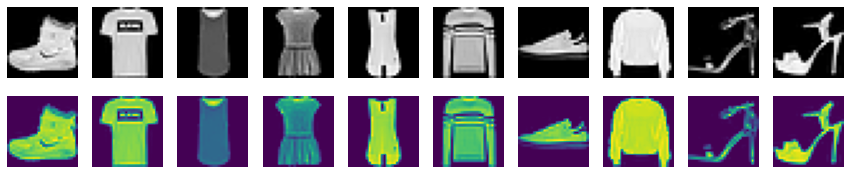

In [90]:
#check what some of the images look like from a random sample of 10 training images
import matplotlib.pyplot as plt
%matplotlib inline

# lets choose some random sample of 10 training images
fig, axarr = plt.subplots(2,10, figsize=(15,3))
for i in range(10):
    axarr[0,i].imshow(x_train[i],cmap='gray')
    axarr[0,i].axis('off')
    axarr[1,i].imshow(x_train[i])
    axarr[1,i].axis('off')
plt.show()

## Task 1: Build a Neural Network WITHOUT Convolutional Layers & Change the Model Structure
1. Build a neural network without convolutional layers to do the classification task (hint: you will need the use of dense layers). Then, you can change the model structure (i.e., number of dense layers, number of neurons in dense layers, or activation functions), to be able to improve network performance.

In [139]:
#import packages
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

#normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

#encode the outputs with one-hot-coding
y_train = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Task 1: Model 1 - Initial Model

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 28, 28, 10)        20        
_________________________________________________________________
flatten_35 (Flatten)         (None, 7840)              0         
_________________________________________________________________
dense_110 (Dense)            (None, 10)                78410     
Total params: 78,430
Trainable params: 78,430
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.7035 - accuracy: 0.7711 - val_loss: 0.5403 - val_accuracy: 0.8105
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.4931 - accuracy: 0.8292 - val_loss: 0.4988 - val_accuracy: 0.8261
Epoch 3/5
60000/60000 [==============

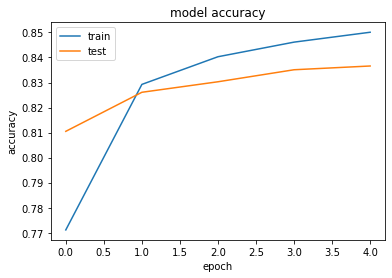

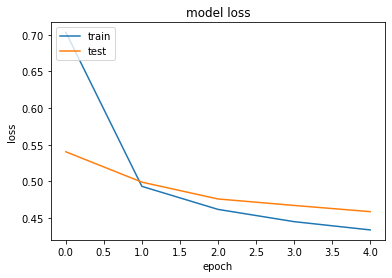

In [142]:
# Build the initial model with 1 hidden layer
model = Sequential()
model.add(Dense(10, input_shape=(28, 28, 1))) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Flatten()) #flatten the image into a vector
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Task 1: Experiments Inbetween Models

#### Experiment 1: increasing the number of neurons in the hidden dense layer from 10 to 512

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 28, 28, 512)       1024      
_________________________________________________________________
flatten_37 (Flatten)         (None, 401408)            0         
_________________________________________________________________
dense_114 (Dense)            (None, 10)                4014090   
Total params: 4,015,114
Trainable params: 4,015,114
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.6794 - accuracy: 0.7792 - val_loss: 0.5332 - val_accuracy: 0.8130
Epoch 2/5
60000/60000 [==============================] - 71s 1ms/step - loss: 0.4868 - accuracy: 0.8314 - val_loss: 0.4952 - val_accuracy: 0.8277
Epoch 3/5
60000/60000 [========

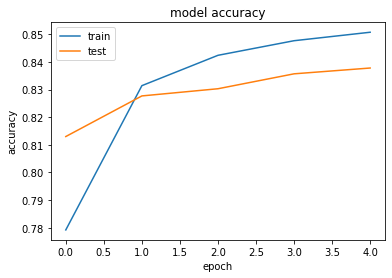

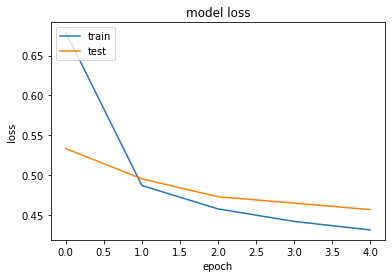

In [144]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(28, 28, 1))) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Flatten()) #flatten the image into a vector
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 2: Using two hidden layers of 10 neurons each

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 28, 28, 10)        20        
_________________________________________________________________
dense_116 (Dense)            (None, 28, 28, 10)        110       
_________________________________________________________________
flatten_38 (Flatten)         (None, 7840)              0         
_________________________________________________________________
dense_117 (Dense)            (None, 10)                78410     
Total params: 78,540
Trainable params: 78,540
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.5975 - accuracy: 0.7949 - val_loss: 0.5028 - val_accuracy: 0.8222
Epoch 2/5
60000/60000 [============================

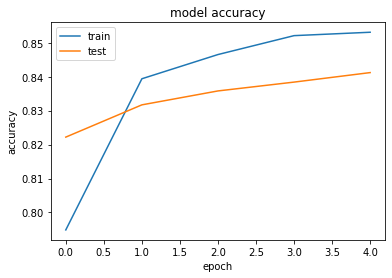

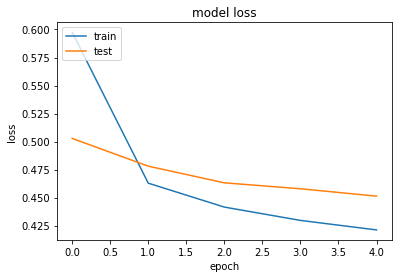

In [145]:
# Build the model
model = Sequential()
model.add(Dense(10, input_shape=(28, 28, 1))) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Dense(10))
model.add(Flatten()) #flatten the image into a vector
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 3: Using five hidden layers of decreasing number of neurons (50, 30, 20, 10, 2)

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 28, 28, 50)        100       
_________________________________________________________________
dense_119 (Dense)            (None, 28, 28, 30)        1530      
_________________________________________________________________
dense_120 (Dense)            (None, 28, 28, 20)        620       
_________________________________________________________________
dense_121 (Dense)            (None, 28, 28, 10)        210       
_________________________________________________________________
dense_122 (Dense)            (None, 28, 28, 2)         22        
_________________________________________________________________
flatten_39 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_123 (Dense)            (None, 10)              

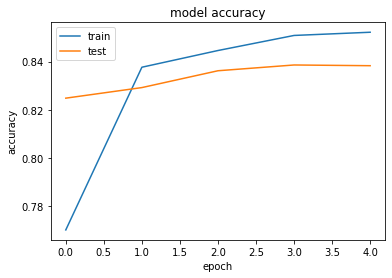

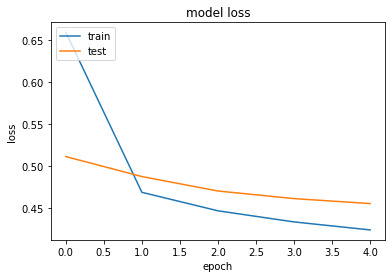

In [146]:
# Build the model
model = Sequential()
model.add(Dense(50, input_shape=(28, 28, 1))) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Dense(30))
model.add(Dense(20))
model.add(Dense(10))
model.add(Dense(2))
model.add(Flatten()) #flatten the image into a vector
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 4: Using five hidden layers of decreasing number of neurons (50, 30, 20, 10, 2) with different activation functions

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 28, 28, 50)        100       
_________________________________________________________________
dense_135 (Dense)            (None, 28, 28, 30)        1530      
_________________________________________________________________
dense_136 (Dense)            (None, 28, 28, 20)        620       
_________________________________________________________________
dense_137 (Dense)            (None, 28, 28, 10)        210       
_________________________________________________________________
dense_138 (Dense)            (None, 28, 28, 2)         22        
_________________________________________________________________
flatten_41 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_139 (Dense)            (None, 10)              

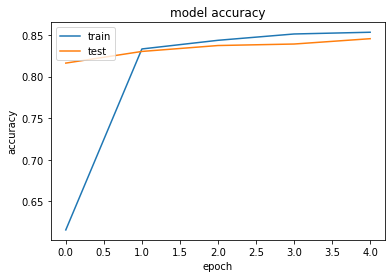

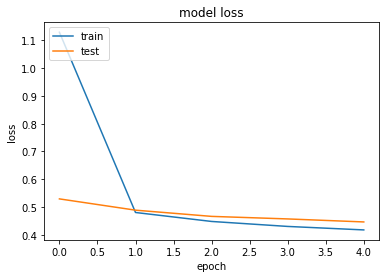

In [148]:
# Build the model
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(28, 28, 1))) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10))
model.add(Dense(2))
model.add(Flatten()) #flatten the image into a vector
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 5: Using four hidden layers of decreasing number of neurons (100, 50, 20, 10) with sigmoid and then relu activation functions

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 28, 28, 100)       200       
_________________________________________________________________
dense_141 (Dense)            (None, 28, 28, 50)        5050      
_________________________________________________________________
dense_142 (Dense)            (None, 28, 28, 20)        1020      
_________________________________________________________________
dense_143 (Dense)            (None, 28, 28, 10)        210       
_________________________________________________________________
flatten_42 (Flatten)         (None, 7840)              0         
_________________________________________________________________
dense_144 (Dense)            (None, 10)                78410     
Total params: 84,890
Trainable params: 84,890
Non-trainable params: 0
_________________________________________________

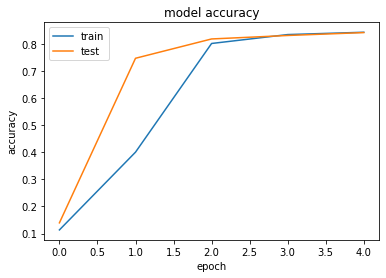

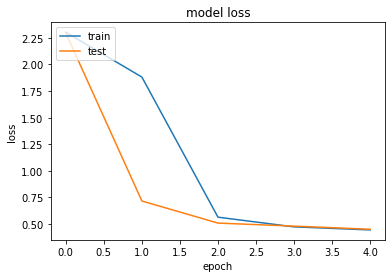

In [149]:
# Build the model
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Flatten()) #flatten the image into a vector
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 6: Using four hidden layers (50, 100, 20, 10) with sigmoid and then relu activation functions

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 28, 28, 50)        100       
_________________________________________________________________
dense_146 (Dense)            (None, 28, 28, 100)       5100      
_________________________________________________________________
dense_147 (Dense)            (None, 28, 28, 20)        2020      
_________________________________________________________________
dense_148 (Dense)            (None, 28, 28, 10)        210       
_________________________________________________________________
flatten_43 (Flatten)         (None, 7840)              0         
_________________________________________________________________
dense_149 (Dense)            (None, 10)                78410     
Total params: 85,840
Trainable params: 85,840
Non-trainable params: 0
_________________________________________________

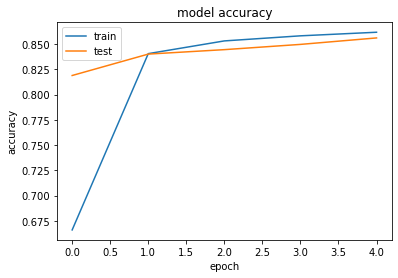

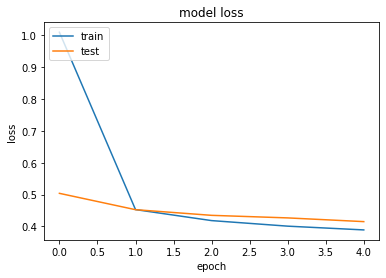

In [151]:
# Build the model
model = Sequential()
model.add(Dense(50, activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Dense(100, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10))
model.add(Flatten()) #flatten the image into a vector
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 7: Same as Experiment 6 but utilising two dropout layers

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 28, 28, 50)        100       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 50)        0         
_________________________________________________________________
dense_151 (Dense)            (None, 28, 28, 100)       5100      
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 100)       0         
_________________________________________________________________
dense_152 (Dense)            (None, 28, 28, 20)        2020      
_________________________________________________________________
dense_153 (Dense)            (None, 28, 28, 10)        210       
_________________________________________________________________
flatten_44 (Flatten)         (None, 7840)            

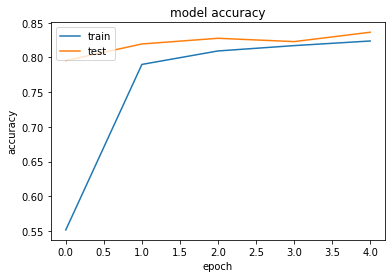

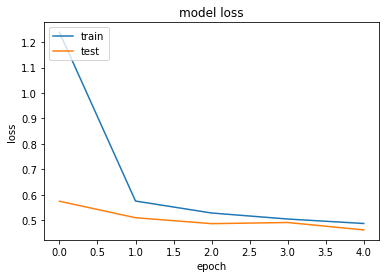

In [152]:
# Build the model
model = Sequential()
model.add(Dense(50, activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(10))
model.add(Flatten()) #flatten the image into a vector
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Task 1: Model 2 - Better Accuracy

The second model for task 1 is based on the best performing experimental model above: Experiment 6. This model uses four hidden layers (50, 100, 20, 10) with sigmoid then relu functions, and achived an accuracy of 85.61%.

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 28, 28, 50)        100       
_________________________________________________________________
dense_166 (Dense)            (None, 28, 28, 100)       5100      
_________________________________________________________________
dense_167 (Dense)            (None, 28, 28, 20)        2020      
_________________________________________________________________
dense_168 (Dense)            (None, 28, 28, 10)        210       
_________________________________________________________________
flatten_47 (Flatten)         (None, 7840)              0         
_________________________________________________________________
dense_169 (Dense)            (None, 10)                78410     
Total params: 85,840
Trainable params: 85,840
Non-trainable params: 0
_________________________________________________

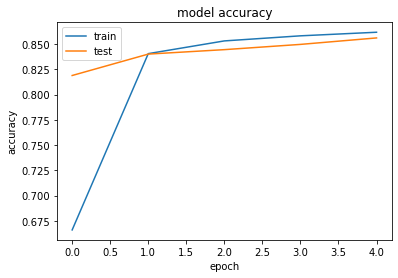

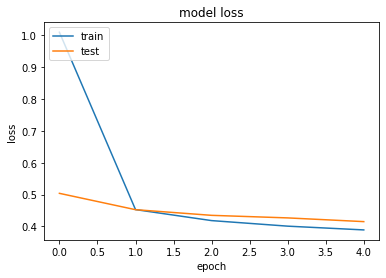

In [155]:
# Build the model
model = Sequential()
model.add(Dense(50, activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Dense(100, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10))
model.add(Flatten()) #flatten the image into a vector
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Task 2: Build a Neural Network WITH Convolutional Layers

2. Build a neural network with the use of convolutional layers (you can decide other layer types you want to include in your network). Then, you can change: the number of convolutional layers, the number of filters, or activation function functions in convolutional layers, to be able to improve network performance.

### Task 2: Model 1 - Initial Model

### Task 2: Experiments Inbetween Models

#### Experiment 1: increasing the number of neurons in the hidden dense layer from 10 to 512

## Task 3: Change the type of Optimizer or Learning Rate that you applied in the previous tasks

3. Change the type of optimizer or learning rate that you applied in the previous tasks, and see how these changes can influence model
performance (You can keep the final network structure you applied in task 2, and try at least one different optimizer setting).

### Task 3.1: Change Task 1 Optimizer or Learning Rate

### Task 3.2: Change Task 2 Optimizer or Learning Rate